<img src="./../Imagenes/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Practico de Laboratorio N°2: Filtros digitales

## Verificacion de filtro IIR Butterworth diseñado con Matlab

#### Tomas A. Albanesi

C:\Users\tomas\AppData\Local\Temp\ipykernel_24252\2500092264.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), label='IIR')


ValueError: x, y, and format string must not be None

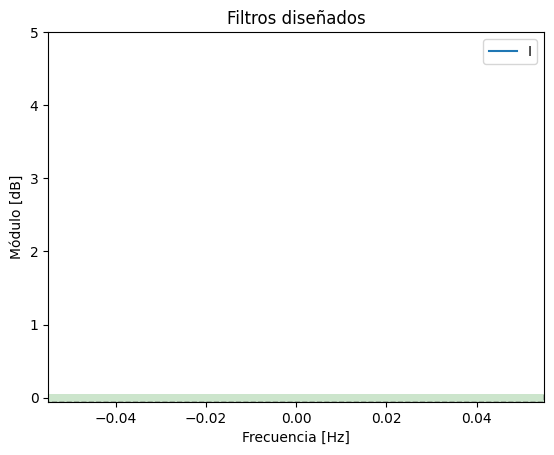

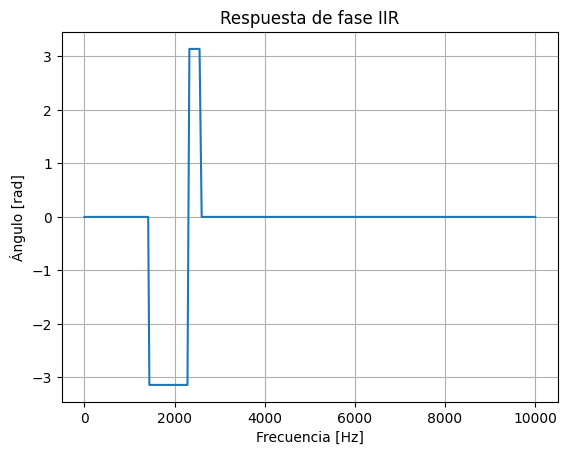

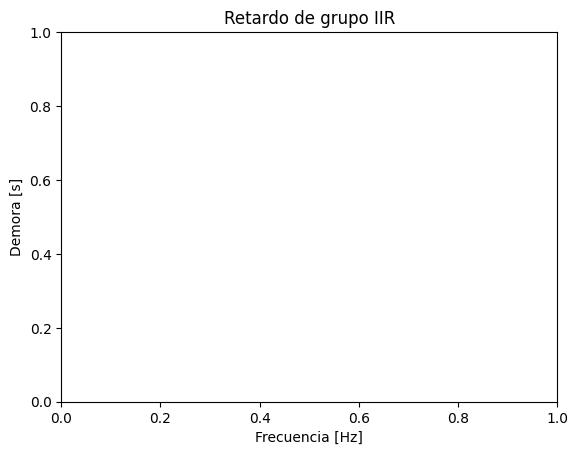

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, plot_plantilla

def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    

# Plantilla
f_pass = 2e3
f_stop = 3e3
at_pass = 1
at_stop = 20
fs = 44e3
f_nyq = fs/2

# Coeficientes
num_iir = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
den_iir = np.array([1.0,-6.251286764827624,17.25256169175674,-27.430888773686586,27.4615598927683,-17.715048722548413,7.187283504183495,-1.6760204424282201,0.17192222214359928])

w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

_, h = sig.freqz(num_iir, den_iir, w)

w = w / np.pi * f_nyq

# Modulo
#plt.axis([0, 100, -60, 5 ]);
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='IIR')
plt.legend('IIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
#fase_iir = np.unwrap(np.angle(h))
fase_iir = np.angle(h)
plt.plot(w, fase_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -25, 5 ]);

# Retardo
gd_iir = group_delay(w, fase_iir)
plt.figure()
plt.title('Retardo de grupo IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -2, 7 ]);